In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

### 2. Implement thuật toán PCA bằng numpy

In [19]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components

    def fit_transform(self, X):
        X = X - np.mean(X, axis = 0)
        cov_mat = np.cov(X.T)
        
        self.eig_vals , self.eig_vecs = np.linalg.eig(cov_mat)
        
        sorted_idx = np.argsort(self.eig_vals)[::-1]
        sorted_eigvals = self.eig_vals[sorted_idx]
        sorted_eigvecs = self.eig_vecs[:, sorted_idx]
        
        eigvec_subset = sorted_eigvecs[:, 0:self.n_components]
        
        X_reduced = np.dot(eigvec_subset.T, X.T).T
        
        return X_reduced

    def explained_variance(self):
        variance_explained = []
        for i in self.eig_vals:
            variance_explained.append((i/sum(self.eig_vals)))
        return variance_explained


### 3. Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

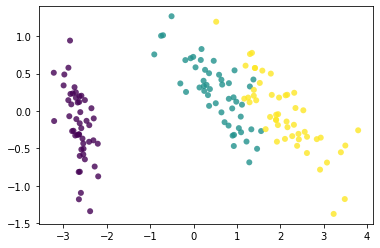

In [26]:
pca = PCA(2)
reduced = pca.fit_transform(X)
plt.scatter(reduced[:, 0], reduced[:, 1], c=y, edgecolor="none", alpha=0.8)
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

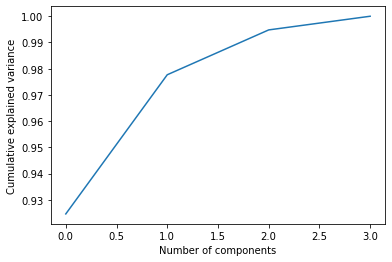

In [31]:
# Visualize explained variance
explained_var = pca.explained_variance()
plt.plot(np.cumsum(explained_var))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### 4. Thử dùng bài 3 với thuật toán PCA trong sklearn, so sánh kết quả

In [28]:
from sklearn.decomposition import PCA

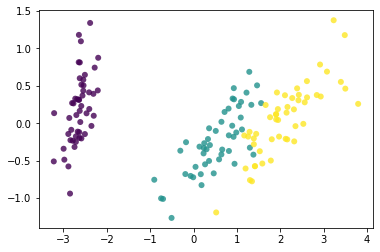

In [32]:
pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.scatter(components[:, 0], components[:, 1], c=y, edgecolor="none", alpha=0.8)
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

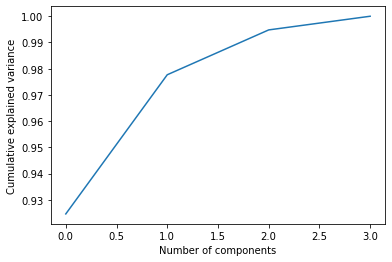

In [33]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')